In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv


In [3]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


ph


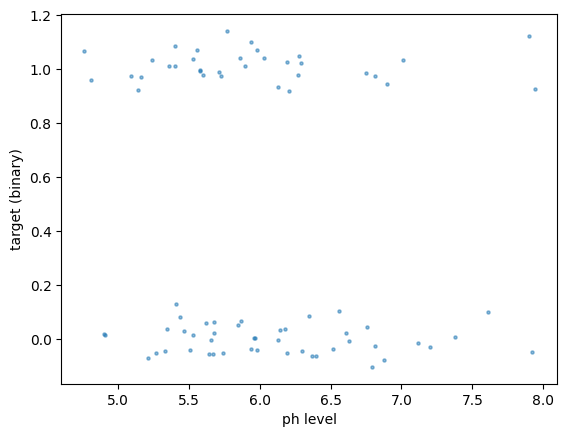

In [41]:
import matplotlib.pyplot as plt

feature = df.columns[1]
fig, axs = plt.subplots(1, 1)
print(feature)
#axs[0].scatter(df["y"], df[feature])
jittered_y = df["target"] + np.random.normal(0, 0.05, size=len(df))
axs.scatter(df[feature], jittered_y, alpha=0.5, s=5)
axs.set_xlabel("ph level")
axs.set_ylabel("target (binary)")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(df.drop(["target"], axis=1))
y = df["target"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, class_weight={0:.4, 1:.6})

lr.fit(X_train, y_train)
print(confusion_matrix(y_val, lr.predict(X_val)))
lr.score(X_val, y_val)

[[4 0]
 [2 2]]


0.75

In [43]:
import warnings
warnings.filterwarnings('ignore')
# avoiding "max_iter" warning

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="relu", random_state=41)

mlp.fit(X_train, y_train)
print(confusion_matrix(y_val, mlp.predict(X_val)))
mlp.score(X_val, y_val)

[[4 0]
 [1 3]]


0.875

In [10]:
from sklearn.svm import SVC

svc = SVC(random_state=42)

svc.fit(X_train, y_train)
print(confusion_matrix(y_val, svc.predict(X_val)))
svc.score(X_val, y_val)

[[3 1]
 [2 2]]


0.625

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
print(confusion_matrix(y_val, dt.predict(X_val)))
dt.score(X_val, y_val)

[[3 1]
 [1 3]]


0.75

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train, y_train)
print(confusion_matrix(y_val, knn.predict(X_val)))
knn.score(X_val, y_val)

[[4 0]
 [3 1]]


0.625

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(df.drop("target", axis=1).cov())
print(eigenvalues)
print(eigenvalues[0]/sum(eigenvalues))

[7.03484609e+04 3.34911477e+03 9.83884551e+00 7.30201666e+00
 1.01725443e-05 4.79253090e-01]
0.954327803652293


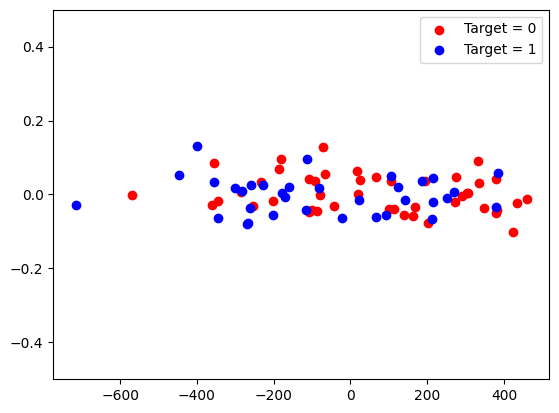

In [40]:
import matplotlib.pyplot as plt
import numpy as np

centered = df.drop("target", axis=1) - df.drop("target", axis=1).mean()

eigenvector1_T = list(map(lambda lst : lst[0], eigenvectors))
PC1 = eigenvector1_T @ centered.T

PC1_0 = PC1[df['target'] == 0]
jitter_0 = np.random.normal(0, 0.05, size=len(PC1_0))

PC1_1 = PC1[df['target'] == 1]
jitter_1 = np.random.normal(0, 0.05, size=len(PC1_1))

plt.scatter(PC1_target_0, jitter_0, color='red', label='Target = 0')
plt.scatter(PC1_target_1, jitter_1, color='blue', label='Target = 1')

plt.ylim(-0.5, 0.5)
plt.legend()
plt.show()

In [81]:
print(confusion_matrix(y_test, lr.predict(X_test)))
lr.score(X_test, y_test)

[[5 2]
 [1 0]]


0.625

In [82]:
print(confusion_matrix(y_test, mlp.predict(X_test)))
mlp.score(X_test, y_test)

[[5 2]
 [0 1]]


0.75

In [83]:
print(confusion_matrix(y_test, svc.predict(X_test)))
svc.score(X_test, y_test)

[[5 2]
 [1 0]]


0.625

In [84]:
print(confusion_matrix(y_test, dt.predict(X_test)))
dt.score(X_test, y_test)

[[4 3]
 [0 1]]


0.625

In [85]:
print(confusion_matrix(y_test, knn.predict(X_test)))
knn.score(X_test, y_test)

[[7 0]
 [1 0]]


0.875